In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/SLR_basic_120.pkl','rb'))
params={'beta0':-1, 'beta1':1, 'mu_x':0.5, 'sigma_ep':1}
# heights = {'beta0':14, 'beta1':350,'s2_ep':30}
# heights={'beta0':8, 'beta1':10, 'mu_x':10, 's2_x':3, 's2_ep':1, 's2_v':3, 's2_d':3}

beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']

s2_ep = mcmc.act_params['s2_ep']

n = 120
np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
x = np.random.uniform(10, 40, n)
y = beta0 + beta1*x + ep

In [20]:
mcmc.params['sigma_ep']

[1,
 1.9715932158577656,
 1.9715932158577656,
 1.9715932158577656,
 3.2860229871417355,
 3.2860229871417355,
 8.677570153161039,
 15.731377692386497,
 15.731377692386497,
 15.731377692386497,
 21.279246200713374,
 17.437498855765057,
 17.437498855765057,
 13.09074949512742,
 21.864748074732766,
 21.864748074732766,
 17.49610314572321,
 17.49610314572321,
 17.49610314572321,
 17.49610314572321,
 42.524616932711325,
 101.7218894443175,
 101.7218894443175,
 101.7218894443175,
 101.7218894443175,
 28.231455935090114,
 20.900307764922186,
 22.485890508721056,
 49.45508046472358,
 49.45508046472358,
 81.74998633514427,
 92.31874274436585,
 88.03786875790554,
 132.55890360349935,
 132.55890360349935,
 195.2403552158561,
 195.2403552158561,
 195.2403552158561,
 247.29144073125246,
 247.29144073125246,
 247.29144073125246,
 247.29144073125246,
 625.4442302624743,
 625.4442302624743,
 996.4252284477884,
 996.4252284477884,
 2162.88336221763,
 732.0519644955635,
 861.1135160191619,
 439.745836849

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:402: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: negative dimensions are not allowed

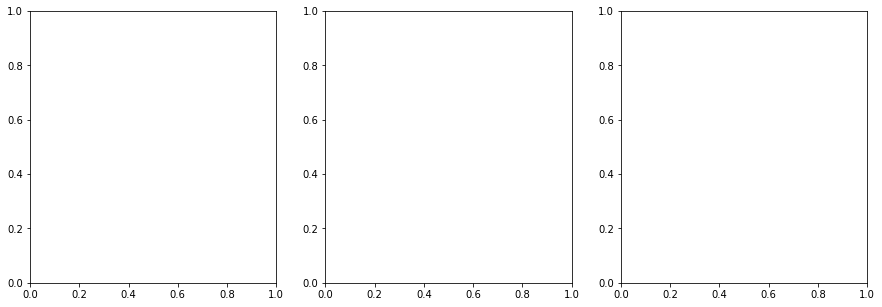

In [21]:
burnin = 50000
thinning = 50

fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):

    key = list(mcmc.params.keys())[a]
    plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i])
    ax[i].set_title(f'ACF Plot for {key}')
            
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/autocorr.png')
plt.show()

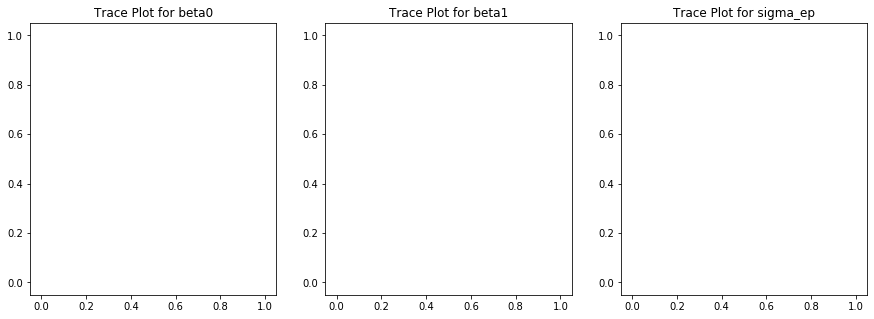

In [22]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    ax[i].plot(mcmc.params[key][burnin::thinning])
    ax[i].set_title(f'Trace Plot for {key}')
    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.12/traceplot.png')
plt.show()

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


IndexError: list index out of range

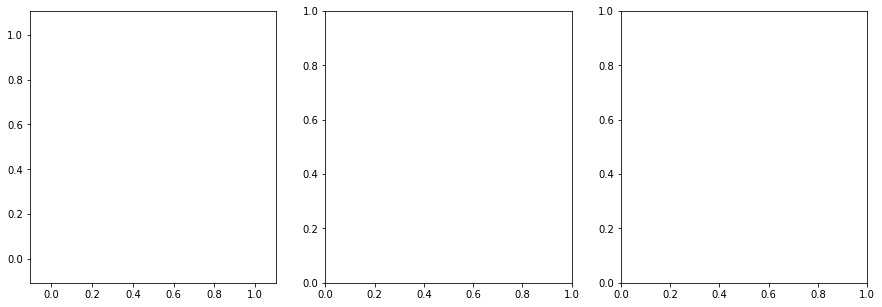

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
a = 0
for i in range(3):
    key = list(mcmc.params.keys())[a]
    sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i], norm_hist=True, bins=30)
    kdeline = ax[i].lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    ax[i].vlines(params[key] ,0, ys.max())
    ax[i].set_title(f'Posterior distribution for {key}')

    a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_12000.png')
plt.show()

In [84]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [85]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -5.839,  6.313
beta1:  -3.219,  3.79
sigma_ep:  18.376,  2917.196
